In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.tokenize import sent_tokenize

In [ ]:
df = pd.read_csv("---")
df

,title,pubDate,guid,link,description
0,Ukraine: Angry Zelensky vows to punish Russian...,"Mon, 07 Mar 2022 08:01:56 GMT",https://www.bbc.co.uk/news/world-europe-60638042,https://www.bbc.co.uk/news/world-europe-606380...,The Ukrainian president says the country will ...
1,War in Ukraine: Taking cover in a town under a...,"Sun, 06 Mar 2022 22:49:58 GMT",https://www.bbc.co.uk/news/world-europe-60641873,https://www.bbc.co.uk/news/world-europe-606418...,"Jeremy Bowen was on the frontline in Irpin, as..."
2,Ukraine war 'catastrophic for global food',"Mon, 07 Mar 2022 00:14:42 GMT",https://www.bbc.co.uk/news/business-60623941,https://www.bbc.co.uk/news/business-60623941?a...,One of the world's biggest fertiliser firms sa...
3,Manchester Arena bombing: Saffie Roussos's par...,"Mon, 07 Mar 2022 00:05:40 GMT",https://www.bbc.co.uk/news/uk-60579079,https://www.bbc.co.uk/news/uk-60579079?at_medi...,The parents of the Manchester Arena bombing's ...
4,Ukraine conflict: Oil price soars to highest l...,"Mon, 07 Mar 2022 08:15:53 GMT",https://www.bbc.co.uk/news/business-60642786,https://www.bbc.co.uk/news/business-60642786?a...,Consumers are feeling the impact of higher ene...
...,...,...,...,...,...
42110,Highlights: Wales make history in Dublin,"Tue, 03 Dec 2024 23:07:27 GMT",https://www.bbc.com/sport/football/videos/ckg1...,https://www.bbc.com/sport/football/videos/ckg1...,Watch highlights as Wales win 2-1 in Dublin fo...
42111,Gang jailed over £200m of cocaine in banana boxes,"Tue, 03 Dec 2024 17:48:54 GMT",https://www.bbc.com/news/articles/c3e8pvg284no#9,https://www.bbc.com/news/articles/c3e8pvg284no,More than two tonnes of the Class A drug was s...
42112,Scottish Budget presents huge challenges for SNP,"Tue, 03 Dec 2024 23:00:17 GMT",https://www.bbc.com/news/articles/ckg1m1j2grpo#9,https://www.bbc.com/news/articles/ckg1m1j2grpo,Finance Secretary Shona Robison is preparing t...
42113,Celebrations as Wales make history qualifying ...,"Wed, 04 Dec 2024 00:05:52 GMT",https://www.bbc.com/news/articles/c791nq8nl73o#9,https://www.bbc.com/news/articles/c791nq8nl73o,Wales defeated the Republic of Ireland 2-1 mak...


In [3]:
df.columns

Index(['title', 'pubDate', 'guid', 'link', 'description'], dtype='object')

title : 39653
pubDate : 40189
guid : 39203
link : 37856
description : 38731


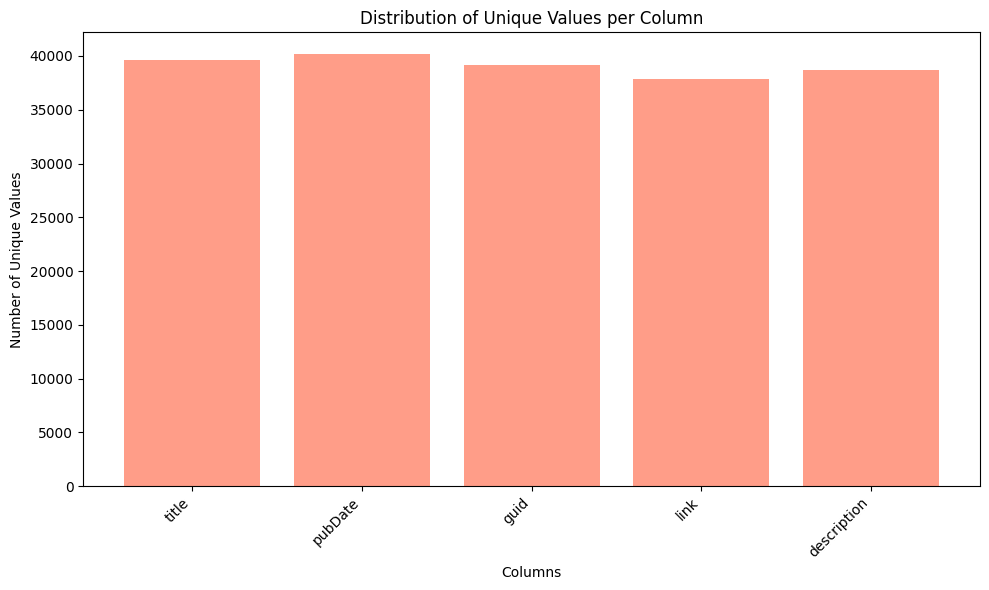

In [4]:
for col in df:
    print(col,":",len(df[col].unique()))


unique_counts = {}
columns_to_plot = ["title", "pubDate", "guid", "link", "description"]

for col in columns_to_plot:
    if col in df.columns: 
        unique_counts[col] = len(df[col].unique())
    else:
        print(f"Warning: Column '{col}' not found in DataFrame.")

plot_columns = list(unique_counts.keys())
plot_values = list(unique_counts.values())

plt.figure(figsize=(10, 6)) 
plt.bar(plot_columns, plot_values, color='#ff9d88') 
plt.title('Distribution of Unique Values per Column')
plt.xlabel('Columns')
plt.ylabel('Number of Unique Values')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

- Basic Stats

In [9]:
import nltk
print(nltk.data.path)


['C:\\Users\\Miguel António/nltk_data', 'c:\\Users\\Miguel António\\AppData\\Local\\Programs\\Python\\Python311\\nltk_data', 'c:\\Users\\Miguel António\\AppData\\Local\\Programs\\Python\\Python311\\share\\nltk_data', 'c:\\Users\\Miguel António\\AppData\\Local\\Programs\\Python\\Python311\\lib\\nltk_data', 'C:\\Users\\Miguel António\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']


In [5]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Miguel
[nltk_data]     António\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
print(f"Total of documents: {len(df)}")
print(f"Empty texts: {df['description'].str.strip().eq('').sum()}")
print(f"Null texts: {df['description'].isnull().sum()}")

Total of documents: 42115
Empty texts: 0
Null texts: 0


In [10]:
df['text_length'] = df['description'].str.len()
df['word_count'] = df['description'].str.split().str.len()
df['sentence_count'] = df['description'].apply(lambda x: len(sent_tokenize(x)) if x.strip() else 0)

print("Lenght of texts:")
print(f"  Mean: {df['text_length'].mean():.2f}")
print(f"  Median: {df['text_length'].median():.2f}")
print(f"  Min: {df['text_length'].min()}")
print(f"  Max: {df['text_length'].max()}")

print(f"\nNumber of words:")
print(f"  Mean: {df['word_count'].mean():.2f}")
print(f"  Median: {df['word_count'].median():.2f}")
print(f"  Min: {df['word_count'].min()}")
print(f"  Max: {df['word_count'].max()}")


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\Miguel António/nltk_data'
    - 'c:\\Users\\Miguel António\\AppData\\Local\\Programs\\Python\\Python311\\nltk_data'
    - 'c:\\Users\\Miguel António\\AppData\\Local\\Programs\\Python\\Python311\\share\\nltk_data'
    - 'c:\\Users\\Miguel António\\AppData\\Local\\Programs\\Python\\Python311\\lib\\nltk_data'
    - 'C:\\Users\\Miguel António\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************
